# **Open CV basics**

**Note:** Store an image on Google Drive.
The flower image is uploaded you can download this too.

In [2]:
# mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing open cv and matplot
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# loading an image from google drive folder
folder_path = '/content/drive/My Drive/sample-flowers'
image_file = 'flower-photo-01.jpg'
image_path = os.path.join(folder_path, image_file)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

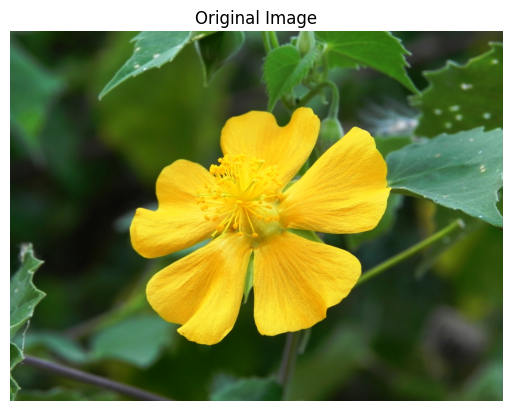

In [5]:
# Displaying Image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [6]:
# get the shape of the image

print(image.shape)


(1875, 2500, 3)


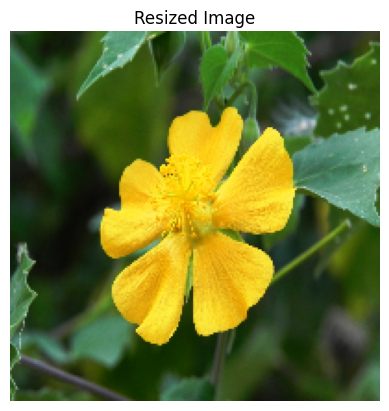

In [7]:
#resize the image
resized_image = cv2.resize(image, (200, 200)) #width and height
plt.imshow(resized_image)
plt.title('Resized Image')
plt.axis('off')
plt.show()

# **Scalling Parameters**


*   **image**: This is the input image that you want to resize or rescale.
*   None: The second parameter is the dsize parameter which defines the size of the output image. When None is passed, the output size is determined by the scaling factors (fx and fy).

*   **fx**: This parameter is the scaling factor along the horizontal axis (width). A value of 0.5 means that the width of the image will be reduced to 50% of the original width.
*   **fy**: This parameter is the scaling factor along the vertical axis (height). A value of 0.5 means that the height of the image will be reduced to 50% of the original height.

*   **interpolation**: This parameter specifies the interpolation method used to resize the image. cv2.INTER_LINEAR is one of the interpolation methods provided by OpenCV, and it uses bilinear interpolation. This method is a good balance between speed and quality for resizing images. Other interpolation methods include:



1.   **cv2.INTER_NEAREST**: Nearest neighbor interpolation.
1.   **cv2.INTER_LINEAR**: Bilinear interpolation (used here).
1.   **cv2.INTER_CUBIC**: Bicubic interpolation over 4x4 pixel neighborhood.
2.   **cv2.INTER_LANCZOS4**: Lanczos interpolation over 8x8 pixel neighborhood.









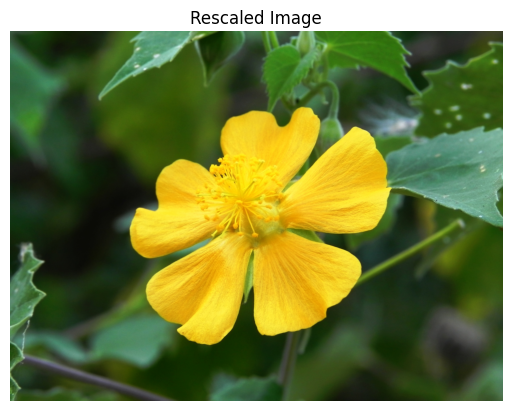

In [8]:
#rescalling the original image

import matplotlib.pyplot as plt
# scaling the image
rescaled_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
plt.imshow(rescaled_image)
plt.title('Rescaled Image')
plt.axis('off')
plt.show()


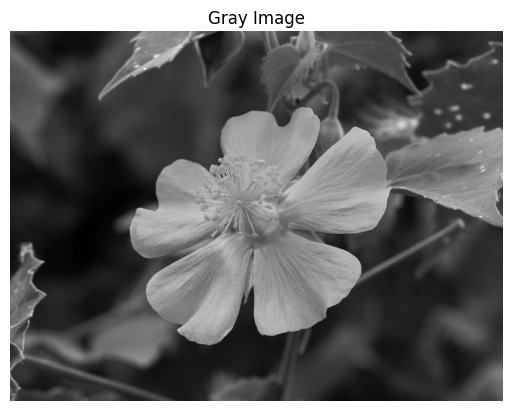

In [9]:

# Converting to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image with a proper colormap
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')
plt.show()


# **Blurring an Image**

**(15, 15):** The size of the Gaussian kernel. This defines the width and height of the kernel used for the Gaussian filter. The larger the kernel size, the more the image will be blurred. The kernel size must be positive and odd.

**10:** The standard deviation (σ) in the X direction. If both σX and σY are set to 0, they are calculated from the kernel size. Otherwise, a specific value can be provided.

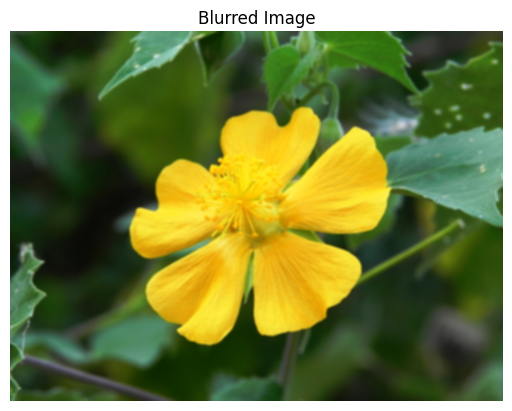

In [10]:
# Blurring an Image
blurred_image = cv2.GaussianBlur(image, (15, 15), 10)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')
plt.show()

# **Edge Detection using canny**

**threshold1 (100 in this example):** The first threshold for the hysteresis procedure. Edges with intensity gradients below this value are discarded.

**threshold2 (200 in this example):** The second threshold for the hysteresis procedure. Edges with intensity gradients above this value are considered as strong edges.

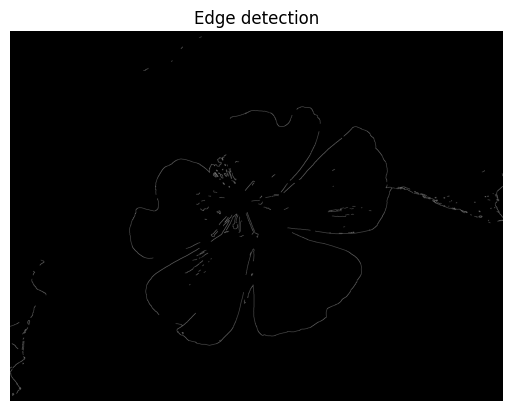

In [11]:
# Edge detection using canny

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)

# Display the edge-detected image with a proper colormap
plt.imshow(edges, cmap='gray')
plt.title('Edge detection')
plt.axis('off')
plt.show()

# **Translation**

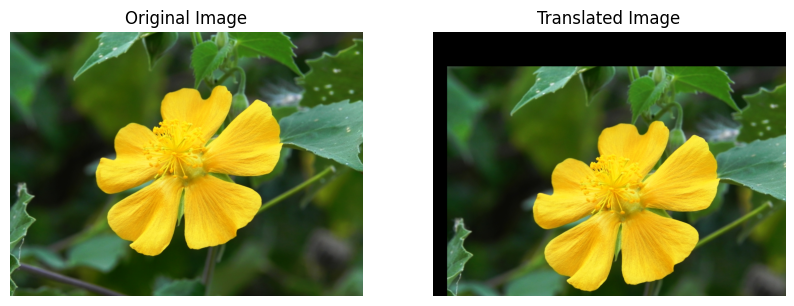

In [8]:
# Translation parameters
tx, ty = 100, 250  # Translate the image 50 pixels right and 50 pixels down

# Create the translation matrix
M = np.float32([[1, 0, tx], [0, 1, ty]])

# Perform the translation
translated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

# Display the original and translated images
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Translated Image')
plt.imshow(translated_image)
plt.axis('off')

plt.show()

# **Rotation**

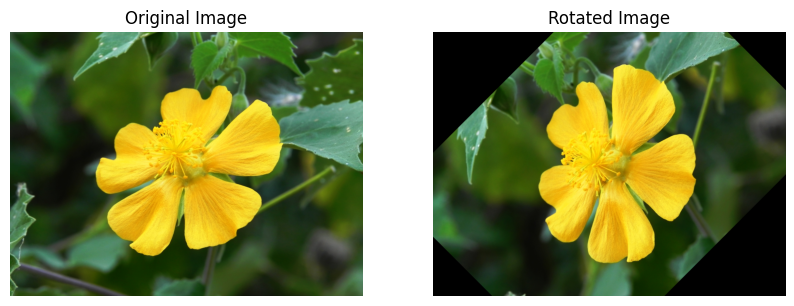

In [11]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # Perform rotation
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# Rotate image by 45 degrees
rotated_image = rotate_image(image, 45)

# Display original and rotated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Rotated Image')
plt.imshow(rotated_image)
plt.axis('off')

plt.show()

# **Normalization**

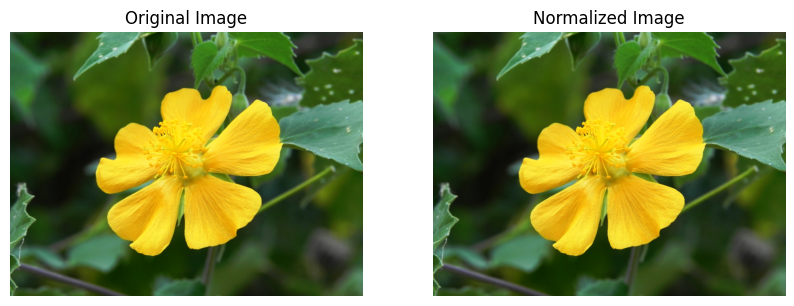

In [13]:
# Normalize image
normalized_image = cv2.normalize(
    image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Display original and normalized images
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Display normalized image
plt.subplot(1, 2, 2)
plt.title('Normalized Image')
plt.imshow(normalized_image, cmap='gray')
plt.axis('off')

# Show the plot
plt.show()